
0: 384x640 1 Placa, 4.0ms
Speed: 2.0ms preprocess, 4.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


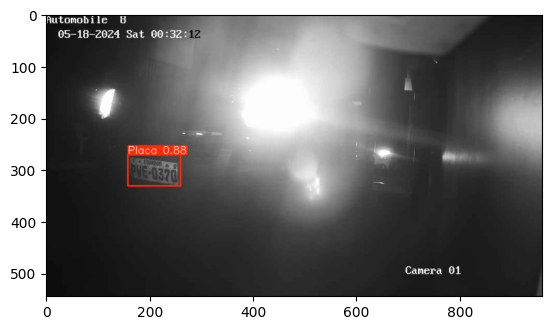

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
model_placa=YOLO("/root/jastudillo/Placas/runs/detect/yolo11_obb_custom/weights/best.pt")

img=Image.open("/root/jastudillo/Placas/data/images/val/06f42286-Jacaranda_554.jpg").convert("RGB")

results=model_placa.predict(img,conf=0.5)
for result in results:
    img_result=result.plot()
    points=result.boxes.xyxy.cpu().numpy()

plt.imshow(img_result)


Points: [[      158.4      271.15      260.99      331.52]]


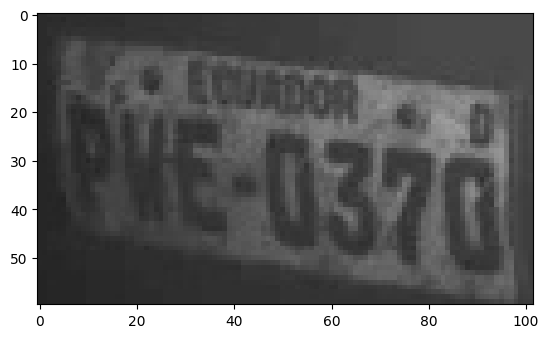

In [39]:
import numpy as np
print("Points:", points)
img_placa=np.array(img)
img_placa = img_placa[int(points[0][1]):int(points[0][3]), int(points[0][0]):int(points[0][2])]
plt.imshow(img_placa)

In [40]:
from cnocr import CnOcr 


ModuleNotFoundError: No module named 'cnocr'